In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import *
from mnist import *
from pandas import *
from datetime import date
from collections import namedtuple
import cv2
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from scipy import *
from sklearn.metrics import confusion_matrix
import itertools
import os
from keras.utils.np_utils import * 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import *
from skimage.filters import threshold_local


In [40]:
homePath_train = "/home/giang/Desktop/ThucTap/Tuan3/data/"

In [41]:
chars = ['0', '1']
chars

['0', '1']

In [42]:
# ham xu li du lieu
def preprocessdata(homePath):
    data=[]
    label=[]
    for i,char in enumerate(chars):
        imgPath = homePath + char + "/"
        print(imgPath)
        imgFiles = os.listdir(imgPath)
#         kk = 0
        for image in imgFiles:
            img = cv2.imread(imgPath + image,0)
            img = cv2.resize(img, (28, 28))
#             print(img.shape)
#             noise_removal = cv2.bilateralFilter(img,9,75,75)

#             equal_histogram = cv2.equalizeHist(noise_removal)
#             img_pad = np.zeros([28, 28])
#             img_pad[6:26, 3:23] = img
            data.append(img)
            label.append(i)

    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

In [43]:
data,label = preprocessdata(homePath_train)

/home/giang/Desktop/ThucTap/Tuan3/data/0/
/home/giang/Desktop/ThucTap/Tuan3/data/1/


In [44]:
x = data
y = label

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_tt = y_test

In [46]:
X_train = reshape(X_train,(-1,28,28,1))
y_train = to_categorical(y_train, num_classes = 2)
X_test = reshape(X_test,(-1,28,28,1))
y_test = to_categorical(y_test, num_classes = 2)

<ipython-input-46-c4f5b2067eb1>:1: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_train = reshape(X_train,(-1,28,28,1))
<ipython-input-46-c4f5b2067eb1>:3: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_test = reshape(X_test,(-1,28,28,1))


In [47]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
# model.summary()
# res = model.fit(X_train, y_train, validation_split=0.2,shuffle=True,
#                  batch_size=32, epochs=100, verbose=1)

# model.save("b2_t3.h5")
model.load_weights("b2_t3.h5")

In [48]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[1.0288562953472138, 0.824999988079071]

In [49]:
results = chars.copy()

In [50]:
# model = Sequential()
# model = create_model()

img_ = cv2.imread("/home/giang/Pictures/anhtest27.png", 0)
X_test__ = cv2.resize(img_, (28, 28))

In [51]:
y_predict = model.predict(X_test__.reshape(1,28,28,1))
test_logits = np.argmax(y_predict, axis=-1)
res__ = results[int(test_logits)]
res__

'0'

In [52]:
kq = model.predict(X_test)
kq

array([[9.99977946e-01, 2.20035818e-05],
       [1.48359641e-01, 8.51640344e-01],
       [1.00000000e+00, 9.21951471e-20],
       [3.73812467e-01, 6.26187503e-01],
       [2.89727688e-01, 7.10272253e-01],
       [1.98826149e-01, 8.01173806e-01],
       [5.21427300e-03, 9.94785726e-01],
       [1.00000000e+00, 1.88167819e-15],
       [8.48824799e-01, 1.51175126e-01],
       [8.57807696e-03, 9.91421878e-01],
       [1.20671943e-01, 8.79328072e-01],
       [9.47773337e-01, 5.22266291e-02],
       [2.08595153e-02, 9.79140520e-01],
       [2.19029441e-01, 7.80970573e-01],
       [1.00000000e+00, 8.12261647e-11],
       [9.37134624e-01, 6.28653243e-02],
       [2.37055440e-02, 9.76294458e-01],
       [4.07774717e-01, 5.92225254e-01],
       [7.86468923e-01, 2.13531047e-01],
       [9.99709547e-01, 2.90429307e-04],
       [8.12731802e-01, 1.87268168e-01],
       [6.02179229e-01, 3.97820741e-01],
       [8.85792971e-01, 1.14207096e-01],
       [5.41405320e-01, 4.58594650e-01],
       [5.914710

In [53]:
resS = np.argmax(kq, axis=-1)
resS

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [54]:
print(classification_report(y_tt, resS, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       162
           1       0.87      0.76      0.81       158

    accuracy                           0.82       320
   macro avg       0.83      0.82      0.82       320
weighted avg       0.83      0.82      0.82       320



In [66]:
im = cv2.imread("/home/giang/Pictures/anhtest4.png", 1)

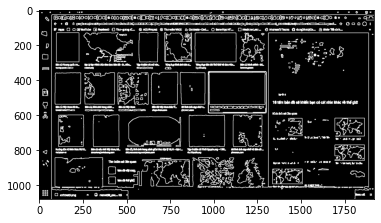

In [75]:
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

noise_removal = cv2.bilateralFilter(im_gray,9,75,75)

equal_histogram = cv2.equalizeHist(noise_removal)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=20)

sub_morp_image = cv2.subtract(equal_histogram,morph_image)
ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)

canny_image = cv2.Canny(thresh_image,250,255)
kernel = np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
plt.imshow(cv2.cvtColor(dilated_image,cv2.COLOR_BGR2RGB))
plt.show()

In [70]:
contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours= sorted(contours, key = cv2.contourArea, reverse = True)
screenCnt = None
roi_img = []
check = 0
for c in contours:
    peri = cv2.arcLength(c, True) 

    approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
    if len(approx) == 4:
        screenCnt = approx
        (x,y,w,h) = cv2.boundingRect(screenCnt)
        roi = im[y:y+h,x:x+w]
        roi_img.append(roi)
#         plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
#         plt.show()
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        X_test__ = cv2.resize(roi, (28, 28))
        y_predict = model.predict(X_test__.reshape(1,28,28,1))
#         print(" y predict", y_predict)
        test_logits = np.argmax(y_predict, axis=-1)
        res__ = results[int(test_logits)]

        if(res__ == '1'):
            check = 1
#             print("anh co chua 22 ban do")
            break

# print(check)
if(check == 1):
    print("anh co chua ban do")
else:
    print("anh khong chua ban do")

anh co chua ban do
